Summary Results of this Analysis:

1. Observations about the Data
   - Country with the most billionaires - U.S. at 754
   - Most common industries for billionaires - Finance & Investments (372), Manufacturing (324), Technology (314), Fashion & Retail (266), Food & Beverage (212)
   - - Top industries differ between females and males
     - Females account for 12.7% of billionaires, and their top industries are Food & Beverage (45), Manufacturing (45), Fashion & Retail (39), Technology (30), and Finance & Investments (30).
     - For males its Finance & Investments (342), Technology (284), Manufacturing (279), Fashion & Retail (227), and Healthcare (173).
    - The average age for all billionaires is 65, median age is not different.
    - Of 2640 billionaires, 316 changed their citizenship. The most common country to change to was the United Kingdom, followed by the United States, Switzerland, and China
2. Statistics
   - Billionaires were disproportionately born in January as compared to the general population.
   - While population shows a moderate correlation (59%) with the number of billionaires, GDP demonstrates a very strong correlation (97%), indicating that GDP is a much better predictor of billionaire counts than population size.
3. Visualisation for whole analysis (happening in Tableau)
   - Blips
   -- Average age for billionaires is 65
   -- Of 2640 billionaires, 316 changed their citizenship
   - Industry graph
   -- Most common industries vs females and males comparison
   - Month graph
   -- Compare actual to expected
   - Map
   -- show billionaire counts in each country, U.S. is most (can have blip about changing citizenship)
   -- Comparison between pop and bill-counts vs gdp and bill-counts
   -- make note about statistics

In [42]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import pearsonr

In [15]:
billionaires = pd.read_csv('billionaire_statistics.csv')
gen_pop_births = pd.read_csv('birth_months_canada_gen_pop.csv')

In [96]:
#What is the country with the most billionaires?
count_billionaires = billionaires.groupby('country').size().reset_index(name='Count')
# Row with the most billionaires
top_country = count_billionaires.loc[count_billionaires['Count'].idxmax()]
print(top_country)
billionaires.sort_values('age', ascending=False)

country    United States
Count                754
Name: 74, dtype: object


,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
2180,2133,1300,Finance & Investments,George Joseph,101.0,United States,Los Angeles,Insurance,Finance & Investments,United States,...,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
1398,1368,2200,Finance & Investments,Charles Munger,99.0,United States,Los Angeles,Berkshire Hathaway,Finance & Investments,United States,...,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
1342,1312,2300,Food & Beverage,David Murdock,99.0,United States,Ventura,"Dole, real estate",Food & Beverage,United States,...,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2327,2259,1200,Diversified,Keshub Mahindra,99.0,India,Mumbai,Diversified,Diversified,India,...,7.7,2.611000e+12,28.1,113.0,69.4,11.2,49.7,1.366418e+09,20.593684,78.962880
145,146,11800,Diversified,Robert Kuok,99.0,Hong Kong,Hong Kong,"Palm oil, shipping, property",Diversified,Malaysia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,2405,1100,Finance & Investments,Christian Herz,NaN,Germany,Hamburg,Coffee,Finance & Investments,Germany,...,1.4,3.845630e+12,70.2,104.0,80.9,11.5,48.8,8.313280e+07,51.165691,10.451526
2453,2405,1100,Finance & Investments,Michaela Herz,NaN,Germany,Hamburg,Coffee,Finance & Investments,Germany,...,1.4,3.845630e+12,70.2,104.0,80.9,11.5,48.8,8.313280e+07,51.165691,10.451526
2550,2540,1000,Logistics,Chang Kuo-Ming,NaN,Taiwan,Taipei,Transportation,Logistics,Taiwan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2603,2540,1000,Manufacturing,Gabriella Meister,NaN,Germany,Landsberg am Lech,Appliances,Manufacturing,Germany,...,1.4,3.845630e+12,70.2,104.0,80.9,11.5,48.8,8.313280e+07,51.165691,10.451526


In [75]:
#What industry do most billionaires work in?
count_industries = billionaires.groupby('industries').size().reset_index(name='Count')
# Row with the most billionaires
top_industry = count_industries.loc[count_industries['Count'].idxmax()]
print(top_industry)
#find top 5 industries
count_industries = count_industries.sort_values('Count',ascending=False)
count_industries.head()

industries    Finance & Investments
Count                           372
Name: 5, dtype: object


,industries,Count
5,Finance & Investments,372
10,Manufacturing,324
16,Technology,314
4,Fashion & Retail,266
6,Food & Beverage,212


Mean age:  65.14019417475728  vs. Median age:  65.0
827
Percentage of billionaires born before 1950:  0.31325757575757573
211000


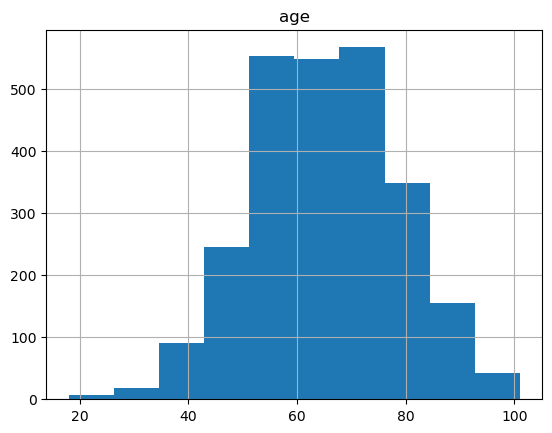

In [89]:
#Average, median age of billionaires - distribution
mean_age = billionaires['age'].mean()
median_age = billionaires['age'].median()
print('Mean age: ',mean_age,' vs. Median age: ',median_age)
billionaires.hist(column='age')
#what percentage of billionaires were born before 1950
before_1950 = billionaires.loc[billionaires['birthYear']<=1950]
print(len(before_1950))
percentage_before_1950 = 827/2640
print("Percentage of billionaires born before 1950: ",percentage_before_1950)
print(max(billionaires['finalWorth']))

In [103]:
#how many billionaires have a different citizenship to their country?
changed_citizenship = billionaires.loc[billionaires['country']!=billionaires['countryOfCitizenship']]
print(len(billionaires))
print(len(changed_citizenship))
#follow-up: which country did most change their citizenship to?
count_country_change = changed_citizenship.groupby('countryOfCitizenship').size().reset_index(name='Count')
top_country = count_country_change.loc[count_country_change['Count'].idxmax()]
print(top_country)
#How does this compare to other countries, can any mathematical statements be made here?
print(count_country_change.sort_values('Count',ascending=False))

#get a value for changing location
citizenship = billionaires['countryOfCitizenship'].tolist()
current_country = billionaires['country'].tolist()
changed = []
for country in range(len(citizenship)):
    if (citizenship[country]!=current_country[country]):
        changed.append(1)
    else:
        changed.append(0)
print(changed)
billionaires['changed'] = changed
billionaires.to_csv('changed.csv')

2640
316
countryOfCitizenship    Russia
Count                       25
Name: 43, dtype: object
   countryOfCitizenship  Count
43               Russia     25
20              Germany     24
54        United States     22
9                Canada     21
22            Hong Kong     19
53       United Kingdom     17
24                India     15
48               Sweden     13
18               France     11
28                Italy     11
50               Taiwan     10
27               Israel      9
11                China      8
7                Brazil      8
13               Cyprus      7
1             Australia      7
32             Malaysia      7
26              Ireland      5
25            Indonesia      4
30              Lebanon      4
14       Czech Republic      4
2               Austria      4
49          Switzerland      4
44            Singapore      4
45          South Korea      3
21               Greece      3
5               Belgium      3
37               Norway      3
42    

In [78]:
#male to female ratio
count_gender = billionaires.groupby('gender').size().reset_index(name='Count')
count_gender.head()
gender_ratio = count_gender['Count'].iloc[0]/(count_gender['Count'].iloc[1] + count_gender['Count'].iloc[0])
print("Percent of female billionaires: ", gender_ratio)
#follow-up, what is the most common industry for females?
female_billionaires = billionaires.loc[billionaires['gender']=='F']
female_industries = female_billionaires.groupby('industries').size().reset_index(name='Count').sort_values('Count',ascending=False)
female_industries.head()
#and for just men, how does it compare to overall trends?
male_billionaires = billionaires.loc[billionaires['gender']=='M']
male_industries = male_billionaires.groupby('industries').size().reset_index(name='Count').sort_values('Count',ascending=False)
male_industries.head()

Percent of female billionaires:  0.12765151515151515


,industries,Count
5,Finance & Investments,342
16,Technology,284
10,Manufacturing,279
4,Fashion & Retail,227
8,Healthcare,173


In [9]:
#beginning letter of first name, are any letters statistically significant?
lucky_names = billionaires
lucky_names['First_Letter'] = billionaires['personName'].str[0]
lucky_letters = lucky_names.groupby('First_Letter').size().reset_index(name='Count').sort_values('Count',ascending=False)
lucky_letters.head(26)
#according to a google search, this pretty much follows the standard sampling for a population

,First_Letter,Count
9,J,231
18,S,201
12,M,201
0,A,190
11,L,177
17,R,161
2,C,146
3,D,137
19,T,118
22,W,113


In [10]:
#state map of billionaires, are billionaires disproportionately residing in one state over another?
#this will be visualised in Tableau, for now just see the most common states
common_states = billionaires.groupby('state').size().reset_index(name='Count').sort_values('Count',ascending=False)
common_states.head()

,state,Count
3,California,178
28,New York,128
6,Florida,94
38,Texas,70
10,Illinois,24


In [32]:
#is one birth month significantly higher than another?
lucky_month = billionaires.groupby('birthMonth').size().reset_index(name='Observed Counts')
lucky_month.head()
print(550/len(billionaires))

0.20833333333333334


21% were born in January. That's actually interesting...would be cool to compare actual/expected values with a chi square 
will use a Canada birth month dataset, as global birth month data is not available, and global birth month is similar-
it only varies by latitude. Since most billionaries were born in the norhtern hemisphere, this is acceptable

In order to run a Chi-square test, we need actual vs. expected values in an observed period. 
First, I will average the Canadian birth months across years.
Next, I standardize the data by taking proportions for each month.
I use the size of the billionaire dataset to convert these proportions to values.
I add the values as another column in the lucky_month dataset.
Finally, I run a chi-square test to compare actual vs. expected values and determine any significance

In [82]:
# Calculate average across the 4 columns for each row
gen_pop_births['Average'] = gen_pop_births[['2019', '2020', '2021', '2022', '2023']].mean(axis=1)
#calculate total to get proportions for each month
total_births = gen_pop_births['Average'].sum()
print("Total_births: ",total_births)
#divide each average by the total_births to get proportions for each month
gen_pop_births['Proportions'] = gen_pop_births['Average']/total_births
#get total of billionaires
total_billionaires = lucky_month['Observed Counts'].sum()
#multiply by proportions to get expected values
lucky_month['Expected Counts'] = gen_pop_births['Proportions']*total_billionaires
print('Expected total: ',lucky_month['Expected Counts'].sum(),' vs observed total: ',lucky_month['Observed Counts'].sum())
lucky_month.head(13)
#pivot to be able to compare expected and observed
melted_months = lucky_month.melt(id_vars=['birthMonth'], value_vars=['Expected Counts', 'Observed Counts'], 
                    var_name='Type', value_name='Value')

melted_months.to_csv('lucky_months.csv', index=False)

Total_births:  361498.2
Expected total:  2563.9999999999995  vs observed total:  2564


In [34]:
#run Chi square to test significance
observed = lucky_month['Observed Counts'].tolist()
expected = lucky_month['Expected Counts'].tolist()
chi2_stat, p_val = stats.chisquare(observed, expected)

In [35]:
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_val}")

Chi-square statistic: 640.5563612906
P-value: 2.931538172408378e-130


In [90]:
#Who are the billionaires born in January?
january_born = billionaires.loc[billionaires['birthMonth']==1]
january_born.sort_values('finalWorth',ascending=False)

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
7,8,93000,Telecom,Carlos Slim Helu & family,83.0,Mexico,Mexico City,Telecom,Telecom,Mexico,...,3.6,1.258287e+12,40.2,105.8,75.0,13.1,55.1,1.260140e+08,23.634501,-102.552784
25,26,45000,Technology,Zhang Yiming,39.0,China,Beijing,TikTok,Technology,China,...,2.9,1.991000e+13,50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
37,38,33400,Automotive,Robin Zeng,54.0,China,Ningde,Batteries,Automotive,Hong Kong,...,2.9,1.991000e+13,50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
41,41,31600,Fashion & Retail,Gerard Wertheimer,72.0,United States,New York,Chanel,Fashion & Retail,France,...,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2540,1000,Manufacturing,Chen Jiancheng,64.0,China,Shangyu,Manufacturing,Manufacturing,China,...,2.9,1.991000e+13,50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2544,2540,1000,Healthcare,Karl Friedrich Braun,40.0,Germany,Melsungen,Medical technology,Healthcare,Germany,...,1.4,3.845630e+12,70.2,104.0,80.9,11.5,48.8,8.313280e+07,51.165691,10.451526
2543,2540,1000,Healthcare,Johanna Braun,43.0,Germany,Melsungen,Medical technology,Healthcare,Germany,...,1.4,3.845630e+12,70.2,104.0,80.9,11.5,48.8,8.313280e+07,51.165691,10.451526
2542,2540,1000,Healthcare,Anna Maria Braun,44.0,Germany,Melsungen,Medical technology,Healthcare,Germany,...,1.4,3.845630e+12,70.2,104.0,80.9,11.5,48.8,8.313280e+07,51.165691,10.451526


Next, I want to look at correlation between GDP and number of billionaires, and test its significance.
I will use Pearson correlation.

In [48]:
#convert GDP to numeric
#billionaires['gdp_country'] = billionaires['gdp_country'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
billionaires['gdp_country'] = pd.to_numeric(billionaires['gdp_country'])
# Group by 'Country', calculate the count of billionaires, and average GDP
country_billionaires = billionaires.groupby('country').agg(
    Billionaire_Count=('personName', 'count'),  # Count of billionaires
    Average_GDP=('gdp_country', 'mean')  # Average GDP for each country
).reset_index()
country_billionaires.head()

,country,Billionaire_Count,Average_GDP
0,Algeria,1,1.699882e+11
1,Andorra,1,3.154058e+09
2,Argentina,4,4.496634e+11
3,Armenia,1,1.367280e+10
4,Australia,43,1.392681e+12


In [46]:
#remove nan rows
country_billionaires = country_billionaires.dropna()
#relationship with country gdp - number of billionaires in each country vs. country GDP
count=country_billionaires['Billionaire_Count'].tolist()
gdp=country_billionaires['Average_GDP'].tolist()
correlation, p_value = pearsonr(count,gdp)

In [47]:
# Print the results
print(f'Pearson correlation coefficient: {correlation}')
print(f'P-value: {p_value}')

Pearson correlation coefficient: 0.9701638720426784
P-value: 2.4454501261651302e-42


Again I want to see which countries have a significant number of billionaires based on countries.
I will run another chi square test, to look at actual counts of billionaires vs. expected based on the proportion of the world's population in a given country.
I will use the world population value today at 8.062 billion.
I will divide the country population by the world population to get proportions.
I will times the proportion by the total number of billionaires to get expected values.
I re-add this to the dataset and run the chi square test.

In [65]:
#group by country data
billionaires_countries = billionaires.groupby('country').agg(
    Observed_billionaires=('personName', 'count'),  # Count of billionaires
    population=('population_country', 'mean')  # Average GDP for each country
).reset_index()
#world population value
world_pop = 8062000000
#determine proportion of world population
billionaires_countries['Proportion_of_world'] = billionaires_countries['population']/world_pop
#total billionaires
total_billionaires = billionaires_countries['Observed_billionaires'].sum()
#determine expected counts
billionaires_countries['Expected_billionaires'] = billionaires_countries['Proportion_of_world']*total_billionaires
billionaires_countries.head()

,country,Observed_billionaires,population,Proportion_of_world,Expected_billionaires
0,Algeria,1,43053054.0,0.005340,13.895317
1,Andorra,1,77142.0,0.000010,0.024897
2,Argentina,4,44938712.0,0.005574,14.503911
3,Armenia,1,2957731.0,0.000367,0.954604
4,Australia,43,25766605.0,0.003196,8.316138


In [71]:
#clean up
billionaires_countries = billionaires_countries.dropna()
#run correlation test
count=billionaires_countries['Observed_billionaires'].tolist()
pop=billionaires_countries['population'].tolist()
correlation, p_value = pearsonr(count,pop)

In [72]:
# Print the results
print(f'Pearson correlation coefficient: {correlation}')
print(f'P-value: {p_value}')

Pearson correlation coefficient: 0.5984459404239671
P-value: 7.051622676031626e-08
